In [86]:
import os, sys
from pandas.plotting import scatter_matrix
#import time


from sklearn.neighbors import LocalOutlierFactor
#from sklearn.metrics import r2_score

from scipy.stats import variation

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from dateutil.parser import parse

#import itertools
from itertools import compress, product

#!pip install pmdarima
#import pmdarima as pm
from pmdarima import auto_arima

# Open a file
path = "/Users/andaks/Documents/oil_gas_train_test"
dirs = os.listdir( path )

# This would print all the files and directories
for file in dirs:
   print(file)

CDEV.xlsx
COG.xlsx
CNX.xlsx
FANG.xlsx
AR.xlsx
TALO.xlsx
HES.xlsx
MTDR.xlsx
GDP.xlsx
WLL.xlsx
CRK.xlsx
LPI.xlsx
SBOW.xlsx
RRC.xlsx
CLR.xlsx
APA.xlsx
EOG.xlsx
VNOM.xlsx
DVN.xlsx
EQT.xlsx
MUR.xlsx
CHK.xlsx
SD.xlsx
OVV.xlsx
MGY.xlsx
ESTE.xlsx
SWN.xlsx
AMPY.xlsx
NOG.xlsx
MRO.xlsx
DEN.xlsx
BSM.xlsx
LONE.xlsx
XOG.xlsx
CRC.xlsx
BCEI.xlsx
MNRL.xlsx
BRY.xlsx
SM.xlsx
PVAC.xlsx
PXD.xlsx
COP.xlsx
PDCE.xlsx
WTI.xlsx
OAS.xlsx
EGY.xlsx
XEC.xlsx
TPL.xlsx
BATL.xlsx
REI.xlsx
CPE.xlsx
MCF.xlsx


In [52]:
import pandas as pd

In [65]:
#read excel files, convert them to pandas data frames

# make an empty data frame
d = {'Name': [0], 'Date': [0], 'Revenue': [0], 'Operating Income': [0] }
df = pd.DataFrame(data = d)

# read all the files with data and join them together
for file in dirs:
#use cringe name lol
    lol = pd.read_excel("/Users/andaks/Documents/oil_gas_train_test/" + str(file))
# delete empty columns and rows
    lol = lol.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
           'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis = 1)
    lol = lol.drop(lol.index[:26])
    lol = lol.loc[[26, 28, 42, 165, 309]]
    
# rename rows
    lol.index = ["Date", "Revenue", 'Operating Income', 'Total Assets', 'Free Cash Flow']
    lol = lol.T

# add stock name
    lol['Name'] = str(file).split('.')[0]

# add its own color (for further work)
    import random
    col = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    lol['Color'] = col[0]
    
# add stock data to the main data set
    df = pd.concat([df, lol])

# remove empty first line
df = df.iloc[1: , :]
df = df.reset_index(drop = True)

df

,Name,Date,Revenue,Operating Income,Total Assets,Free Cash Flow,Color
0,CDEV,Q1 '11 A,0,0,0,0,#AF7834
1,CDEV,Q2 '11 A,0,0,0,0,#AF7834
2,CDEV,Q3 '11 A,0,0,0,0,#AF7834
3,CDEV,Q4 '11 A,0,0,0,0,#AF7834
4,CDEV,Q1 '12 A,0,0,0,0,#AF7834
...,...,...,...,...,...,...,...
2179,MCF,Q2 '20 A,17.842,-21.275,195.531008,-1.843,#39C04E
2180,MCF,Q3 '20 A,31.348,2.521,192.819008,15.766,#39C04E
2181,MCF,Q4 '20 A,29.157,-0.874,170.267008,0,#39C04E
2182,MCF,Q1 '21 A,59.95,13.62,436.308992,-88.678,#39C04E


In [66]:
df[20:]

,Name,Date,Revenue,Operating Income,Total Assets,Free Cash Flow,Color
20,CDEV,Q1 '16 A,23.75,-6.105,501.80432,-3.867,#AF7834
21,CDEV,Q2 '16 A,29.39,0.056,501.273984,6.394,#AF7834
22,CDEV,Q3 '16 A,29.273,-1.775,501.04992,3.575,#AF7834
23,CDEV,Q4 '16 A,30.771,-1.932,2651.642112,-865.139968,#AF7834
24,CDEV,Q1 '17 A,60.7,7.653,2653.755904,-82.69,#AF7834
...,...,...,...,...,...,...,...
2179,MCF,Q2 '20 A,17.842,-21.275,195.531008,-1.843,#39C04E
2180,MCF,Q3 '20 A,31.348,2.521,192.819008,15.766,#39C04E
2181,MCF,Q4 '20 A,29.157,-0.874,170.267008,0,#39C04E
2182,MCF,Q1 '21 A,59.95,13.62,436.308992,-88.678,#39C04E


In [55]:
import numpy as np

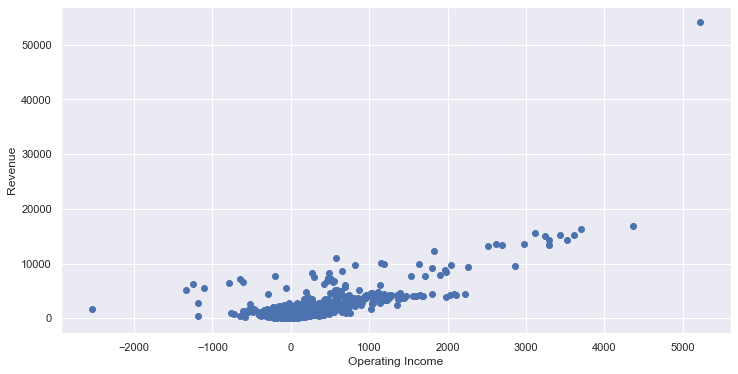

In [56]:
import matplotlib.pyplot as plt 

# Let's vizualise this data
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df['Operating Income'], df['Revenue']) 
ax.set_xlabel('Operating Income')
ax.set_ylabel('Revenue')
plt.show() 

## We have a visible trend (the higher oper income, the higher revenue and vice versa)

 There are two outliers in our data - they are based in the left down and right up positions. We should drop them to have a better picture.
 
 Two good metrics here are roc_auc and log_loss. Log_loss metric is usefull with financial data as it helps to find differences in percents.
 
 We should try to imply data seasonality and make different plots for different time periods. We have to check this hypothesis.

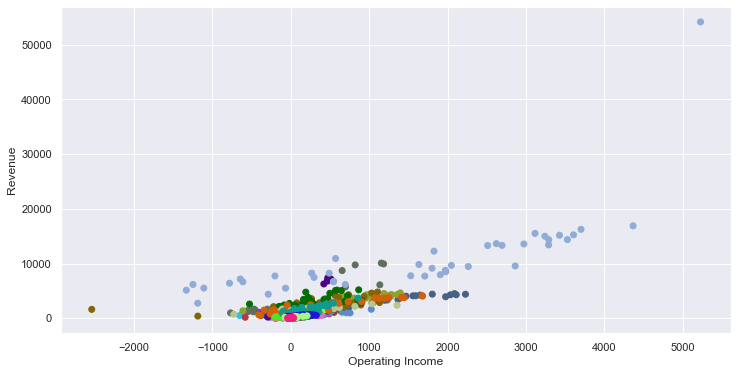

In [57]:
import matplotlib.pyplot as plt 

# Let's vizualise this data with own colors (different stocks have different colors)
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df['Operating Income'], df['Revenue'], color = df['Color']) 
ax.set_xlabel('Operating Income')
ax.set_ylabel('Revenue')
plt.show() 

## Baseline solution

In [68]:
#df2 = df.copy()

In [71]:
df['Date'] = df['Date'].map(lambda x: x.rstrip('aA'))
df['Date'] = df['Date'].str.replace("'", '20')
df['Date'] = df['Date'].str.replace(r'(Q\d) (\d+)', r'\2-\1')
df['Date'] = pd.to_datetime([
    '-'.join(x.split()[::-1]) for x in df['Date']])
df

,Name,Date,Revenue,Operating Income,Total Assets,Free Cash Flow,Color
0,CDEV,2011-01-01,0,0,0,0,#AF7834
1,CDEV,2011-04-01,0,0,0,0,#AF7834
2,CDEV,2011-07-01,0,0,0,0,#AF7834
3,CDEV,2011-10-01,0,0,0,0,#AF7834
4,CDEV,2012-01-01,0,0,0,0,#AF7834
...,...,...,...,...,...,...,...
2179,MCF,2020-04-01,17.842,-21.275,195.531008,-1.843,#39C04E
2180,MCF,2020-07-01,31.348,2.521,192.819008,15.766,#39C04E
2181,MCF,2020-10-01,29.157,-0.874,170.267008,0,#39C04E
2182,MCF,2021-01-01,59.95,13.62,436.308992,-88.678,#39C04E


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style = "darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df["Revenue"].to_numpy()
#X = df.drop(columns=["Revenue"])
X = df['Operating Income'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, shuffle=True)
print(y_train)

[411 215.296992 47.959 ... 253.468 978.4 261.040992]


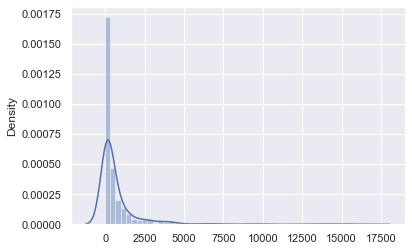

In [18]:
sns.distplot(y_train)
plt.show()

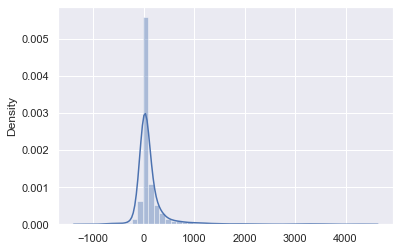

In [19]:
sns.distplot(X_train)
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils.validation import check_array

model = LinearRegression()
model = model.fit([X_train], [y_train])
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(f"Test RMSE = {mse(y_test, y_pred, squared=False):.2f}")
print(f"Train RMSE = {mse(y_train, y_train_pred, squared=False):.2f}")

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.50976260e+01  3.67940000e+01 -5.86100000e+00  0.00000000e+00
  6.57530000e+01 -4.65710000e+01  5.08356992e+02  5.50000000e+00
  6.80000000e+01  2.26100000e+00  9.49600000e+00  2.48000000e+02
  1.53376000e+02  1.16153850e+01  5.71100000e+00  4.04830000e+01
  7.26390000e+01  0.00000000e+00 -3.69000000e+02  5.38230000e+01
  9.25120000e+01  2.76690000e+01  9.35220720e+01 -3.02700000e+00
  3.19810000e+01  9.43300000e+00  2.69299994e+03  7.08248000e+02
 -8.40000000e+01  2.74840000e+01 -3.40000000e+02 -1.64100000e+00
  7.66200000e+00  2.66000000e+02  1.67400000e+03  3.69984992e+02
  2.20420000e+01  7.39700000e+00  1.77252992e+02  1.38746000e+02
  7.21000000e+02  3.05556000e+02 -2.10424160e+02  4.52370000e+01
  7.84352900e+00  1.08046730e+01  0.00000000e+00  1.87910000e+02
  2.24790000e+01  2.63890000e+02  5.60000000e+02 -1.80400000e+00
  2.00410000e+01  5.07280000e+01  0.00000000e+00 -5.75800000e+00
  1.24770000e+02 -4.00000000e+00  1.70800000e+03  3.68050000e+01
  6.19750000e+01 -2.42350000e+01 -1.94470000e+01  4.26650000e+01
  1.26303000e+02  3.28747008e+02 -8.54800000e+01  1.02160000e+02
  1.03840000e+01  2.52928992e+02  2.95000000e+02  6.36180000e+01
  4.88076928e+02  1.41011720e+01  1.07620000e+01 -4.62080000e+01
  0.00000000e+00  2.90000000e+02 -2.54000000e+03  0.00000000e+00
  7.52330000e+01  2.00393920e+02  0.00000000e+00  1.19500006e+03
  1.42518000e+02  4.43000000e+02  5.84830000e+01  2.70912000e+02
 -1.56000000e+02  7.11900000e+00  3.97710000e+01  1.84300000e+02
  8.77308900e+00  1.05190000e+01  3.79440000e+01  0.00000000e+00
  2.45100000e+01  1.71558000e+02 -1.50360000e+01  1.28154000e+02
  2.71299936e+02  3.51990000e+01  4.56440000e+01  6.74940000e+01
  5.03490000e+01 -9.81845360e+01  1.12887000e+02  5.37200000e+00
  5.70080000e+01  1.34100000e+02 -2.23000000e+02 -7.76010000e+01
  3.09228992e+02  4.89150000e+01  1.03560000e+01  2.98000000e+02
  2.71600000e+01 -1.73340000e+01  1.43424100e+01  0.00000000e+00
 -3.49000000e+00 -1.48135008e+02  6.32730000e+01  1.30921760e+01
  4.06280000e+01  1.90343008e+02 -1.33400000e+03 -4.28200000e+00
  5.32600000e+01  5.45221520e+01  3.41300000e+00  4.35200000e+00
  1.19611000e+02  4.73310000e+01  6.64050000e+01 -1.75900000e+00
  4.60000000e+01  1.77602680e+01  0.00000000e+00  1.51542000e+02
  2.20700000e+01  2.83790016e+02  6.34000000e+02  6.43069900e+00
  2.06320000e+01  1.49848096e+02  1.47080000e+01  1.21312000e+02
  7.11800000e+00  2.08700000e+00  1.64800000e+03  9.34000000e+02
  4.99690000e+01 -4.02632896e+02  5.53209024e+02  0.00000000e+00
 -2.37850000e+01  3.52800000e+01  6.37000000e+00  7.85520000e+01
  8.80000000e+02  6.50300000e+00  2.04590000e+01  1.66120000e+01
  9.23310000e+01 -1.85400000e+00  1.98190000e+01  2.53300000e+00
 -9.53050000e+01  1.11854000e+02  1.06174000e+02 -1.78210000e+01
  0.00000000e+00 -1.76210000e+01 -1.28150000e+01 -2.26167008e+02
  6.50890000e+01  1.87990464e+02  3.25932992e+02 -3.54520000e+01
  0.00000000e+00  1.03600000e+03  8.26000000e+00  0.00000000e+00
  1.45463008e+02  2.73066304e+02  0.00000000e+00  2.22956992e+02
  9.54700000e+00  1.14700000e+00  7.61040000e+01 -4.76400000e+00
  7.96580000e+01  5.87500000e+01  1.18300000e+00  7.34500000e+01
  1.61529750e+01  4.96000000e+00 -5.12600000e+01  1.19710000e+01
  1.35363008e+02  5.87700000e+00  4.65550000e+01 -3.67937000e-01
  6.98310000e+01  0.00000000e+00 -2.15700000e+01  1.39554701e+03
  1.95090000e+02  1.55795008e+02  0.00000000e+00  5.78000000e+02
  0.00000000e+00  3.14956480e+01  0.00000000e+00  7.62740000e+01
  2.08700006e+03  1.92520000e+01  2.54810000e+01  3.92210000e+01
  0.00000000e+00  0.00000000e+00 -2.14000000e+02  7.40490000e+01
  1.93940000e+01 -3.24600000e+00  2.60880000e+01  3.89210000e+01
  2.64130000e+01  9.10800000e+00  9.94700000e+00 -1.15000000e+02
  1.87000000e+02  7.12700000e+01  1.38510000e+01  1.15400000e+03
  8.04180000e+01  8.91900000e+01  0.00000000e+00  4.80000000e-02
 -1.64405152e+02  4.23232000e+02  1.02119501e+03  0.00000000e+00
 -2.19190000e+01  7.22000000e+02  2.32651008e+02  1.23182048e+02
  1.38698000e+02 -5.27769216e+02  2.33352992e+02  8.08740000e+01
  1.39126576e+02  1.78576992e+02  4.41300000e+00  2.16000000e+02
  4.20000000e+02  0.00000000e+00  1.20600000e+01  0.00000000e+00
  3.22000000e+02 -5.13800000e+00  4.66370000e+01  3.60000000e+01
  2.12779620e+01  0.00000000e+00  9.66160000e+01 -4.28480000e+01
 -1.34480000e+01  2.79950000e+01  2.13384992e+02 -1.71000000e+02
  4.62970000e+01  8.16000000e+02 -4.58000000e+02  1.98474000e+02
  0.00000000e+00  2.49500000e+00  1.42520000e+01  7.09900000e+00
  1.99616992e+02  3.90875008e+02  5.02300000e+00 -1.05500000e+00
  2.40051008e+02  5.27590000e+01  2.85126592e+02  0.00000000e+00
  9.01000000e+02  0.00000000e+00  3.13420000e+01  1.99276992e+02
  1.71500000e+00  4.88640000e+01  1.26108864e+02  1.14455696e+02
  1.19000000e+02  2.04680000e+01  6.32200000e+01  0.00000000e+00
 -9.90000000e+01  6.64518720e+01 -2.86300000e+00  2.04700006e+03
 -7.04200000e+00 -1.74630000e+01 -9.09150000e+01  9.63840000e+01
  1.28327706e+03  4.40240000e+01  6.23320000e+01  1.75152992e+02
 -1.10000000e+01  6.51960000e+01  3.83670000e+01  1.58028000e+02
  5.53000000e-01  1.45000000e+02  9.17050000e+01 -3.63900000e+00
  4.04900000e+01  1.60715760e+01  1.97600000e+03 -1.69520000e+01
 -6.20330000e+01  1.35830000e+01  1.50880000e+01 -1.16340000e+01
  5.86080000e+01  4.60000000e+01  2.06974720e+01  1.25678000e+02
  3.65000000e+02  0.00000000e+00  1.44076992e+02  6.61800000e+01
 -2.25000000e+00  8.40000000e+01  6.10000000e+02  1.35499008e+02
  7.00460000e+01  2.03550000e+01  0.00000000e+00  1.44210000e+02
 -1.95384620e+01 -1.24899994e+03  1.69970000e+01 -5.31400000e+00
  3.02660000e+01  2.43631008e+02  0.00000000e+00  6.75000000e+00
  4.83630000e+01  8.70740000e+01  7.73230000e+01  1.70000000e+00
  1.62645150e+01  1.49723008e+02  3.10240000e+01 -3.86183008e+02
  1.66000000e+00  2.14410000e+01  5.94850000e+01  2.80570000e+01
  1.10600000e+03  3.72180000e+01  6.00640000e+01  6.58000000e+00
  2.11470000e+01  3.72050000e+01  0.00000000e+00  4.20000000e+01
  1.09392000e+02  3.23170000e+01  0.00000000e+00  1.05638099e+03
  2.62107699e+03 -6.10500000e+00 -6.80000000e+01  1.27800000e+00
  6.10980000e+01  2.23000000e+02  1.31513000e+02  1.12531648e+02
  1.90010000e+01  2.15800000e+01  4.16000000e+02 -1.83700000e+00
  4.27951008e+02  2.91742016e+02  3.62890000e+01  7.18520000e+01
 -9.68200000e+00 -3.57710000e+01  6.28850000e+01  1.27398000e+02
 -1.00000000e+00  8.25630000e+01  1.19541000e+02  5.22499994e+03
  0.00000000e+00  2.93660992e+02  6.40000000e+01  7.74700000e+00
  3.87390000e+01  6.21407400e+00  7.61300000e+00 -1.36280000e+01
  5.49260000e+01  5.21140000e+01  3.35759488e+02 -8.04000000e-01
  4.10220000e+01  2.16748992e+02  5.59000000e+02  1.39048992e+02
  1.78000000e+02  1.02354850e+01  2.20400000e+00  8.19300000e+00
  1.69276000e+02  0.00000000e+00  9.07000000e-01  2.84177480e+01
  1.66004992e+02  4.85319008e+02 -5.40250000e+01  6.10700000e+00
  2.08620000e+01  4.95700000e+01  4.81810000e+01  6.26340000e+01
  5.05700000e+01  2.51076992e+02  2.78860000e+01  2.10260000e+01
  2.36790000e+01  0.00000000e+00  5.44460000e+01  8.80520000e+01
  2.95718016e+02  6.20550000e+01  1.82000000e-01  1.07943000e+02
  0.00000000e+00  0.00000000e+00  7.00000000e+01  5.07600000e+00
 -4.27460000e+01 -3.82000000e+02  3.10791008e+02  2.82120000e+01
  8.08000000e+02  1.61000000e+02  5.24000000e-01 -7.82000000e-01
  4.27580000e+02  1.60000000e+02 -4.38860000e+01  5.80720000e+01
  1.45940000e+01  1.60644000e+02  4.66400000e+02  0.00000000e+00
  7.99400000e+00 -1.18800000e+03  9.02923072e+02  1.27000000e+02
  8.35200000e+00 -8.54400000e+00  1.14320000e+01  1.16970000e+01
  8.18830000e+01  2.76500000e+00  1.58890000e+01  2.08690000e+01
  6.48000000e+01  1.39000000e+02  1.18865395e+03 -6.39800000e+00
  0.00000000e+00  1.65000000e+00 -4.79000000e+02  1.05794000e+02
 -7.00000000e+00  8.05380000e+01  1.45176000e+02  3.43700000e+01
  1.39384000e+02  1.07248000e+02  0.00000000e+00 -2.80000000e+01
  3.28890000e+01  3.35476000e+02  8.90000000e+01  0.00000000e+00
  1.25000000e+03  1.02504698e+03  6.50070000e+01 -5.79600000e+00
  6.91430000e+01  0.00000000e+00  1.33928460e+01  8.89000000e+02
  3.59700000e+00  1.30600000e+01  3.20390000e+01  1.99927400e+01
 -2.38570000e+01  6.01410000e+01  1.74304000e+02  7.97000000e+02
  0.00000000e+00  1.63030000e+01  2.15000000e+02  1.72130000e+01
 -1.67290000e+01  1.47000000e+02  7.25640000e+01  3.24648000e+02
  6.44000000e+02  5.50000000e+01  1.00666000e+02  1.05640000e+01
 -1.99891400e+00  6.34680000e+01  2.70100000e+00  1.97100006e+03
  2.76313984e+02  2.32140000e+01  5.70615360e+02  1.66994000e+02
  3.61220000e+01 -7.37800000e+00  8.10400000e+00 -3.55090000e+01
  5.73730000e+01  1.54880000e+01  0.00000000e+00  1.98050000e+02
 -2.58920000e+01  4.90520000e+01  1.38200000e+03  4.40170000e+01
 -1.36930000e+01  3.33000000e+02  1.26733000e+02  4.96330000e+01
 -1.64500000e+00  5.79100000e+01  9.30000000e+01  1.63299994e+03
  5.48460000e+01 -6.48370000e+01  9.05390000e+01  5.06240000e+01
  2.27072992e+02  3.39670000e+01 -1.70900000e+00  4.00040000e+01
  1.50069970e+01  5.92000000e+02 -1.15450000e+01  4.06400000e+00
 -1.19963080e+01  5.55000000e+02  8.54300000e+00  2.46100000e+01
  1.48000000e+02  2.44724000e+02  2.43000000e+02  4.53840000e+01
  0.00000000e+00  5.72270000e+01 -5.15520000e+01  2.65846160e+02
 -7.62290000e+01  1.93386000e+02  4.79518976e+02  1.11421930e+01
  0.00000000e+00  0.00000000e+00 -3.41000000e+02  5.43000000e+02
  0.00000000e+00  9.48910000e+01 -7.66000000e-01  2.51790000e+01
  3.56640000e+01  6.24420000e+01  2.06800000e+01  8.00500000e+00
  1.64892000e+02  0.00000000e+00  0.00000000e+00 -2.03000000e+02
  6.29760000e+01  3.97000000e+02  2.91020000e+01  2.30000000e+01
  5.19730000e+01  1.59656000e+02  7.92440000e+01  1.35400000e+03
  4.27110000e+01  2.36000000e+02  0.00000000e+00  5.50000000e+02
  4.42000000e+01  0.00000000e+00  4.95240000e+01  1.15643000e+02
  1.68624992e+02  9.95920000e+01  3.94620000e+01  1.85500000e+00
  0.00000000e+00 -2.63053850e+00  6.66290000e+01 -1.18700006e+03
  2.51000000e+02  2.41855008e+02  8.90600000e+01  8.86000000e-01
  0.00000000e+00  5.60000000e-02  3.03790000e+01  0.00000000e+00
  0.00000000e+00  1.27320000e+01  2.71000000e+02 -1.00790000e+01
  4.28050000e+01 -6.40980000e+01  2.85390000e+01  4.38630000e+01
 -2.42940000e+01 -3.52250000e+01  0.00000000e+00  0.00000000e+00
 -7.77000000e+01  1.45222000e+02  4.07100000e+00 -2.62776000e+02
  3.53010000e+01  1.19960000e+01  1.25100000e+00 -3.03200000e+00
  1.54564000e+02 -1.54070000e+01 -7.12040000e+01 -2.65800000e+00
 -1.99000000e+02  4.24000000e-01 -1.83560000e+01  1.96000000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method

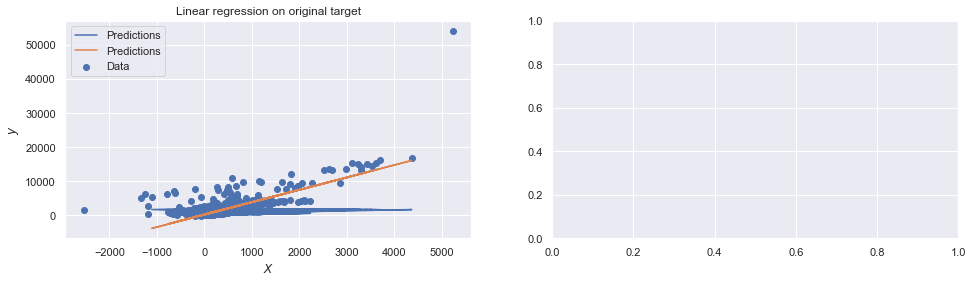

In [147]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)


axs[0].scatter(X, y, label="Data")
axs[0].plot(X_train, y_train_pred, label="Predictions")
axs[0].legend()
axs[0].set_title("Linear regression on original target")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$y$")


y_log = np.log(y_train)
model.fit(X_train, y_log)
y_pred_log = np.exp(model.predict(X_train))
axs[1].scatter(X, y, label="Data")
axs[1].plot(x_train, y_pred_log, label="Predictions")
axs[1].set_title("Linear regression on log target")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$y$")
plt.show()

## SARIMA

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

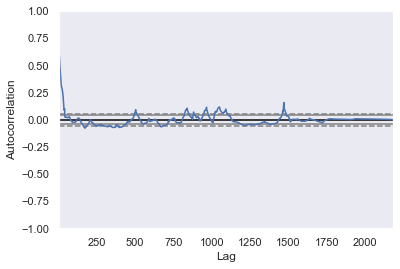

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# check for autocorrelation
pd.plotting.autocorrelation_plot(y)

In [88]:
# Let's find the best parametres
model = auto_arima(y_train, seasonal = True, m=4, trace = True, error_action='ignore', stepwise = True)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=27131.916, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=27124.131, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=27126.709, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=27126.540, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=27395.225, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=27124.806, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=27124.604, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=27126.601, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=27126.022, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=27126.037, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=27128.013, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[4] intercept
Total fit time: 2.649 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True)

In [93]:
model = SARIMAX(data, order=(0, 0, 0), seasonal_order=(0, 0, 0, 4))
model_fit = model.fit(disp=False)
df['forecast'] = model_fit.predict(start=2184, end=2200,  dynamic = True)
df[['Revenue','forecast']].plot(figsize=(12,8))

ValueError: Length of values (17) does not match length of index (2184)